# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [24]:
data.shape

(150000, 11)

------------
## Drop na

In [25]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [26]:
data.dropna(inplace=True)
data.shape

(120269, 11)

---------
## Create X and y

In [27]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [28]:
y.mean()

0.06948590243537403

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [55]:
## your code here
from sklearn.model_selection import train_test_split
import numpy as np

#按照训练集70%，测试集30%进行划分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle = True,random_state = 0)

#查看划分后的shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((84188, 10), (36081, 10), (84188,), (36081,))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

In [30]:
#数据标准化
#将训练集和测试集数据的mean变为0，std变为1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [31]:
## your code here
from sklearn.linear_model import LogisticRegression

#最大迭代次数max_iter默认为100，这种情况下会报warning：迭代次数达到最大值时仍未收敛。所以设置迭代10000次。
#其他参数设置：
#惩罚项：L2，避免过拟合
#solver：'sag',适用于数据量较大的情形
lr = LogisticRegression(C = 100.0**40,random_state = 0,penalty = 'l2',solver = 'sag',max_iter = 10000)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1e+80, max_iter=10000, random_state=0, solver='sag')

In [33]:
#计算训练集正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % lr.score(X_train_std, y_train))

(accuracy_score) Training accuracy: 0.9313


### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [37]:
## your code here
from sklearn.tree import DecisionTreeClassifier
#先不设置max_depth参数
tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
tree.fit(X_train_std, y_train)

#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % tree.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % tree.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 1.0000
(accuracy_score) Test accuracy: 0.8929


#### 层数过多，出现过拟合，导致测试集表现差

In [38]:
#max_depth设置为3
tree1 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 3)
tree1.fit(X_train_std, y_train)

tree2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 5)
tree2.fit(X_train_std, y_train)

#计算正确率,score()自动计算predict后的输出结果
print('Tree1:(accuracy_score) Training accuracy: %.4f' % tree1.score(X_train_std, y_train))
print('Tree1:(accuracy_score) Test accuracy: %.4f \n' % tree1.score(X_test_std, y_test))
print('Tree2:(accuracy_score) Training accuracy: %.4f' % tree2.score(X_train_std, y_train))
print('Tree2:(accuracy_score) Test accuracy: %.4f' % tree2.score(X_test_std, y_test))

Tree1:(accuracy_score) Training accuracy: 0.9333
Tree1:(accuracy_score) Test accuracy: 0.9325 

Tree2:(accuracy_score) Training accuracy: 0.9342
Tree2:(accuracy_score) Test accuracy: 0.9326


#### 表现结果略优于线性回归，5层的结果略好于3层

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
#探索特征对模型分类重要程度
model = ExtraTreesClassifier()
model.fit(X_train_std,y_train)

ser1 = pd.Series(X.columns)
ser2 = pd.Series(model.feature_importances_)
importance = pd.concat([ser1,ser2],axis = 1)
importance.columns = ['Col_name','Importance']
importance

,Col_name,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.168584
1,age,0.123309
2,NumberOfTime30-59DaysPastDueNotWorse,0.064659
3,DebtRatio,0.159979
4,MonthlyIncome,0.157479
5,NumberOfOpenCreditLinesAndLoans,0.103141
6,NumberOfTimes90DaysLate,0.085110
7,NumberRealEstateLoansOrLines,0.040717
8,NumberOfTime60-89DaysPastDueNotWorse,0.051417
9,NumberOfDependents,0.045604


### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [40]:
## your code here
from sklearn.ensemble import RandomForestClassifier

#n_estimators使用默认值100
forest = RandomForestClassifier(criterion = 'entropy',n_estimators = 100,random_state = 0)
forest.fit(X_train_std, y_train)

#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % forest.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % forest.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9999
(accuracy_score) Test accuracy: 0.9326


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [16]:
## your code here
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0,max_iter = 10000)
svm.fit(X_train_std, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(gamma=0.1, max_iter=10000, random_state=0)

In [17]:
#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % svm.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % svm.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9316


### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [46]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

#临近点的个数设为5，距离采用默认的欧式距离
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % knn.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % knn.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9400
(accuracy_score) Test accuracy: 0.9300


---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [47]:
## your code here
#计算训练集正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % lr.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % lr.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9313
(accuracy_score) Test accuracy: 0.9308


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [48]:
## your code here
#计算正确率,score()自动计算predict后的输出结果
print('Tree2:(accuracy_score) Training accuracy: %.4f' % tree2.score(X_train_std, y_train))
print('Tree2:(accuracy_score) Test accuracy: %.4f' % tree2.score(X_test_std, y_test))

Tree2:(accuracy_score) Training accuracy: 0.9342
Tree2:(accuracy_score) Test accuracy: 0.9326


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [49]:
## your code here
#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % forest.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % forest.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9999
(accuracy_score) Test accuracy: 0.9326


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [50]:
## your code here
#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % svm.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % svm.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9316


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [51]:
## your code here
#计算正确率,score()自动计算predict后的输出结果
print('(accuracy_score) Training accuracy: %.4f' % knn.score(X_train_std, y_train))
print('(accuracy_score) Test accuracy: %.4f' % knn.score(X_test_std, y_test))

(accuracy_score) Training accuracy: 0.9400
(accuracy_score) Test accuracy: 0.9300


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [66]:
## your code here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
#逻辑回归
y_test_lr = lr.predict(np.array(X_test_std))
confusion = confusion_matrix(y_test, y_test_lr)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('confusion_matrix: \n',confusion,end ='\n \n')
print('The accuracy is',(TP+TN) / float(TP+TN+FN+FP))

confusion_matrix: 
 [[33487    61]
 [ 2436    97]]
 
The accuracy is 0.9307946010365566


In [68]:
#决策树
y_test_tree = tree.predict(np.array(X_test_std))
confusion = confusion_matrix(y_test, y_test_tree)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('confusion_matrix: \n',confusion,end ='\n \n')
print('The accuracy is',(TP+TN) / float(TP+TN+FN+FP))

confusion_matrix: 
 [[31539  2009]
 [ 1855   678]]
 
The accuracy is 0.8929076245115157


In [70]:
#随机森林
y_test_forest = forest.predict(np.array(X_test_std))
confusion = confusion_matrix(y_test, y_test_forest)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('confusion_matrix: \n',confusion,end ='\n \n')
print('The accuracy is',(TP+TN) / float(TP+TN+FN+FP))

confusion_matrix: 
 [[33207   341]
 [ 2091   442]]
 
The accuracy is 0.932596103212217


In [74]:
#SVM
y_test_svm = svm.predict(X_test_std)
confusion = confusion_matrix(y_test, y_test_svm)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('confusion_matrix: \n',confusion,end ='\n \n')
print('The accuracy is',(TP+TN) / float(TP+TN+FN+FP))

confusion_matrix: 
 [[33481    67]
 [ 2401   132]]
 
The accuracy is 0.931598348161082


In [75]:
#KNN
y_test_knn = knn.predict(np.array(X_test_std))
confusion = confusion_matrix(y_test, y_test_knn)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('confusion_matrix: \n',confusion,end ='\n \n')
print('The accuracy is',(TP+TN) / float(TP+TN+FN+FP))

confusion_matrix: 
 [[33223   325]
 [ 2202   331]]
 
The accuracy is 0.9299631384939442


## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [105]:
## your code here
#选取逻辑回归的部分预测值进行调整
lr.predict(X_test_std)[60:70]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
y_test.values[60:70]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [115]:
##第一列为预测值为0的百分比，第二列为预测值为1的百分比
lr.predict_proba(X_test_std)[60:70, :]

array([[0.95160955, 0.04839045],
       [0.95535703, 0.04464297],
       [0.96377639, 0.03622361],
       [0.91041   , 0.08959   ],
       [0.96386386, 0.03613614],
       [0.90181279, 0.09818721],
       [0.93852982, 0.06147018],
       [0.86952645, 0.13047355],
       [0.9562932 , 0.0437068 ],
       [0.97339109, 0.02660891]])

#### 其中倒数第三行，真实值为1，百分比只有0.13

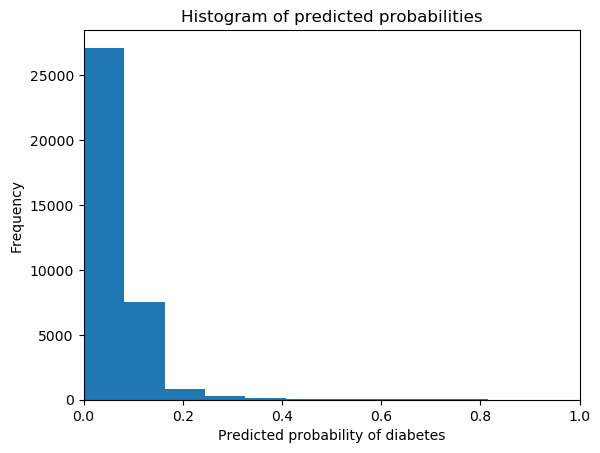

In [120]:
#作直方图统计不同百分比区段内，出现的次数
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]

import matplotlib.pyplot as plt

plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

#### 可以看到绝大多数的百分比都小于0.5，以0.5作为判断的阈值有些不妥

In [123]:
#将阈值threshold改为0.3
from sklearn.preprocessing import binarize
#新阈值下的预测结果
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

In [128]:
#新预测结果下的混淆矩阵
confusion2 = confusion_matrix(y_test, y_pred_class)
print(confusion2)

[[33342   206]
 [ 2290   243]]


In [130]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('The former accuracy is',(TP+TN) / float(TP+TN+FN+FP))

The former accuracy is 0.9299631384939442


In [133]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('The former accuracy is',(TP+TN) / float(TP+TN+FN+FP))

The former accuracy is 0.9299631384939442


In [135]:
TP2 = confusion2[1, 1]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]
print('The latter accuracy is',(TP2+TN2) / float(TP2+TN2+FN2+FP2))

The latter accuracy is 0.9308223164546438


#### 可以发现调整阈值后的正确率有提升